<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Naive_Bayes_Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Naive Bayes for Spam SMS Classification**

## **Objective**  
Train and evaluate a **Naive Bayes classifier** to predict whether a given SMS message is spam or not based on the text content.

---

## **Dataset**  
Download the **Spam SMS dataset** from Kaggle:  
🔗 [Spam SMS Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)  

- Load the **SMSSpamCollection** dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  
- The **"label"** column contains the target variable (spam or ham).  
- The **"message"** column contains the text content of the SMS message.

---

## **Feature Description**  
- **Target Feature:** `label`  
  - `spam` = 1  
  - `ham` = 0  
- **Feature for Training:** `message`  
  - This column contains the content of the SMS message (text data).

---

## **Tasks**  

### **1. Data Preprocessing**  
- Handle missing values (if any).  
- Convert the **"label"** column to a binary format where **spam** = 1 and **ham** = 0.  
- Perform text preprocessing:
  - Convert the text to lowercase.
  - Remove punctuation and special characters.
  - Tokenize the text.
  - Remove stop words (optional).
  - Use **CountVectorizer** or **TfidfVectorizer** to convert text into numerical features.
- Split the dataset into **80% training and 20% testing**.

---

### **2. Train Naive Bayes Model**  
- Train a **Multinomial Naive Bayes classifier** (`MultinomialNB` from `sklearn`) on the training data.
- Evaluate the model's performance using accuracy, precision, recall, and F1-score on the test set.

---

### **3. Hyperparameter Tuning**  
- Experiment with different values of **alpha** (Laplace smoothing parameter) for the Naive Bayes model.
- Use **GridSearchCV** to tune the **alpha** parameter for better performance.

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-Score**  
  - **Confusion Matrix**  

---

### **5. Visualization**  
- Plot the **Confusion Matrix** for the Naive Bayes model to evaluate performance.
- Plot the **ROC curve** and compute the **AUC score** for the model.

---

## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Initial Model Performance:
Accuracy: 0.9812
Precision: 0.9640
Recall: 0.8933
F1-Score: 0.9273

Starting Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters:
{'classifier__alpha': 0.1, 'vectorizer

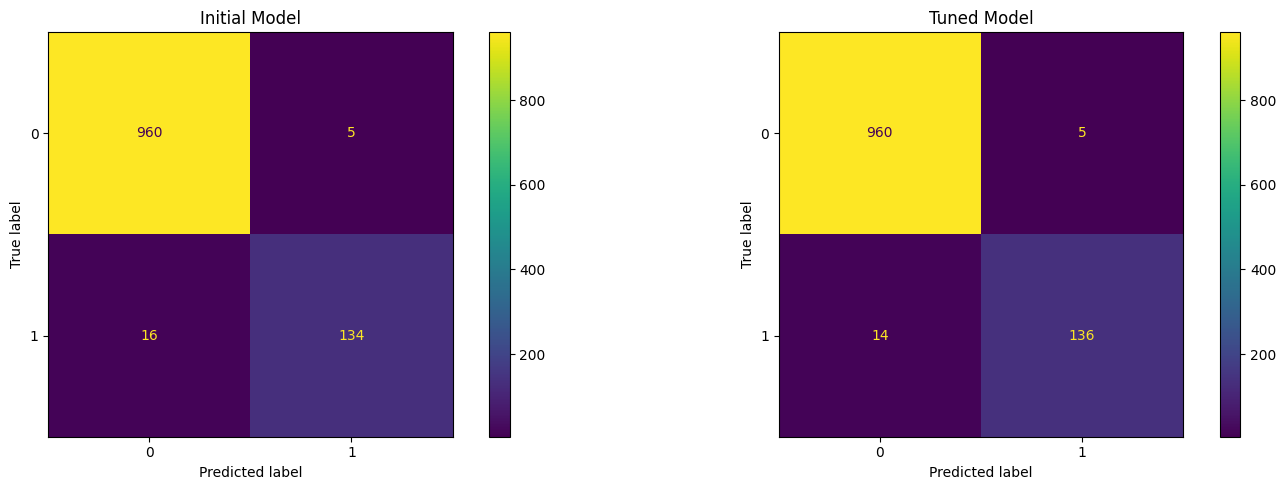

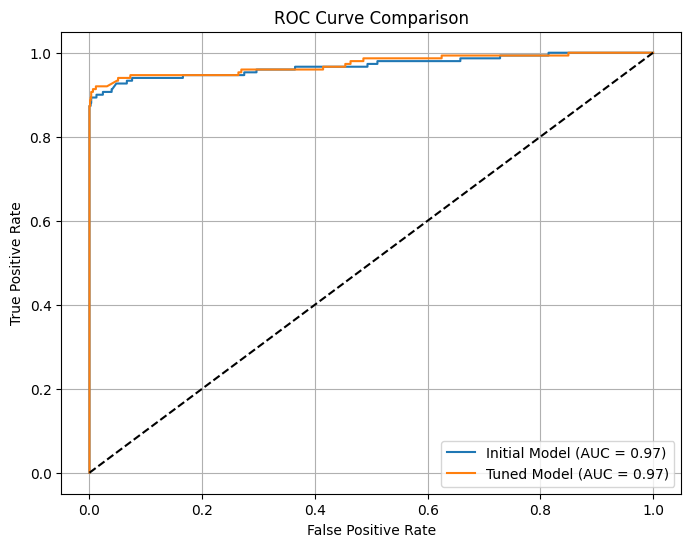

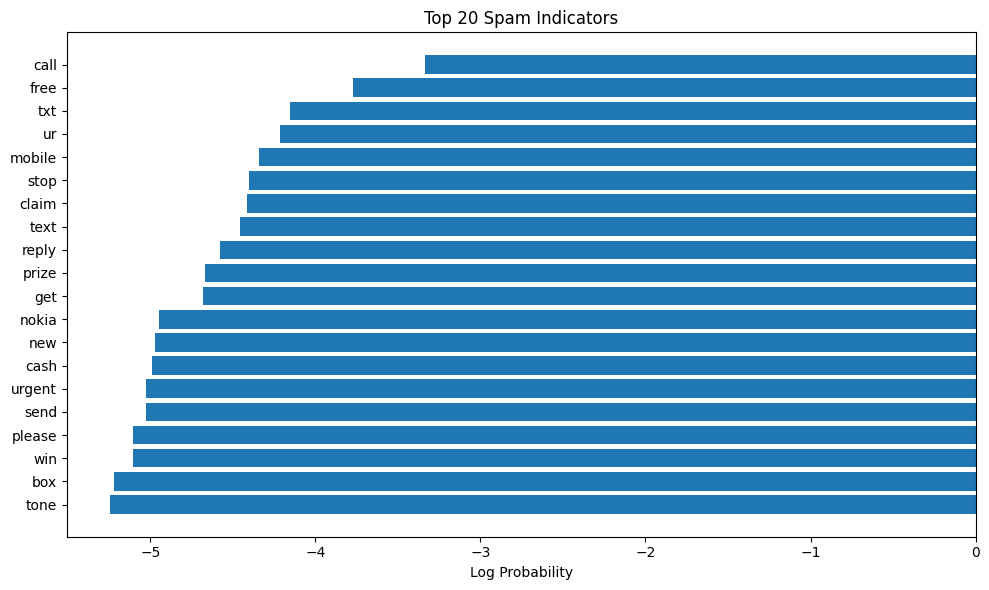

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, roc_curve, auc,
                            ConfusionMatrixDisplay)
from sklearn.pipeline import Pipeline
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')

# Q1: Load and preprocess the data
# Load the dataset (update path as needed)
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Select only label and message columns
df.columns = ['label', 'message']  # Rename columns

# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())

# Convert labels to binary (spam=1, ham=0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])
    # Tokenization and stopword removal
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'], df['label'], test_size=0.2, random_state=42
)

# Q2: Train Naive Bayes Model
# Create pipeline with CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for positive class

print("\nInitial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Q3: Hyperparameter Tuning
# Define parameter grid
param_grid = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__max_features': [1000, 2000, 3000],
    'classifier__alpha': [0.1, 0.5, 1.0, 1.5]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nStarting Grid Search...")
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("\nBest Parameters:")
print(grid_search.best_params_)

# Q4: Evaluate Tuned Model
print("\nTuned Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

# Q5: Visualization
# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Initial model
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=ax1)
ax1.set_title('Initial Model')

# Tuned model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax2)
ax2.set_title('Tuned Model')

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))

# Initial model
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Initial Model (AUC = {roc_auc:.2f})')

# Tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Model (AUC = {roc_auc_tuned:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance (Top 20 words for spam)
if 'CountVectorizer' in str(best_model.named_steps['vectorizer']):
    feature_names = best_model.named_steps['vectorizer'].get_feature_names_out()
    log_prob = best_model.named_steps['classifier'].feature_log_prob_[1]  # spam class

    top_spam_words = pd.DataFrame({
        'word': feature_names,
        'log_prob': log_prob
    }).sort_values('log_prob', ascending=False).head(20)

    plt.figure(figsize=(10, 6))
    plt.barh(top_spam_words['word'], top_spam_words['log_prob'])
    plt.gca().invert_yaxis()
    plt.xlabel('Log Probability')
    plt.title('Top 20 Spam Indicators')
    plt.tight_layout()
    plt.show()

In [ ]:
# Sample prediction
sample_messages = [
    "WINNER!! You won 1 million dollars! Click here to claim",  # Likely spam
    "Hey, let's meet for lunch tomorrow"  # Likely ham
]

clean_samples = [preprocess_text(msg) for msg in sample_messages]
predictions = best_model.predict(clean_samples)
probabilities = best_model.predict_proba(clean_samples)

for msg, pred, prob in zip(sample_messages, predictions, probabilities):
    print(f"\nMessage: {msg}")
    print(f"Prediction: {'spam' if pred == 1 else 'ham'}")
    print(f"Probability (ham): {prob[0]:.4f}")
    print(f"Probability (spam): {prob[1]:.4f}")


Message: WINNER!! You won 1 million dollars! Click here to claim
Prediction: spam
Probability (ham): 0.0000
Probability (spam): 1.0000

Message: Hey, let's meet for lunch tomorrow
Prediction: ham
Probability (ham): 1.0000
Probability (spam): 0.0000
